## **COGNIFIYZ TECHNOLOGIES DATA ANALYSIS INTERNSHIP TASK**
By - ABDUS SAHIR CHOUDHURY
Ref. : CTI/A1/C173039
# **Level 3**


**Task 1: Restaurant Reviews Analysis**

* Analyze the text reviews to identify the mostcommon positive and negative keywords.
* Calculate the average length of reviews andexplore if there is a relationship betweenreview length and rating.


**Task 2: Votes Analysis**

* Identify the restaurants with the highest andlowest number of votes.
* Analyze if there is a correlation between thenumber of votes and the rating of arestaurant.

**Task 3: Price Range vs Online Delivery & Table Booking**

* Analyze if there is a relationship between theprice range and the availability of onlinedelivery and table booking.
* Determine if higher-priced restaurants aremore likely to offer these services.

**Key Statistical Features:**

* Pearson & Spearman correlations
* Chi-square independence tests
* P-value significance testing
* Quartile analysis
* Confidence intervals

**Visualizations Include:**

* Distribution plots and histograms
* Scatter plots with correlation lines
* Box plots for comparisons
* Bar charts for categorical analysis
* Heatmaps for relationship matrices
* Statistical summary tables



# To Use This Code:

* **Install required libraries:**

bash

`pip install pandas matplotlib seaborn scipy textblob nltk`

* **Download NLTK data (run once):**

python

`import nltk`

`nltk.download('punkt')`

`nltk.download('stopwords')`

`nltk.download('vader_lexicon')`




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr
import re
from collections import Counter
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

**Loading Dataset**

In [3]:
df = pd.read_csv('/Dataset .csv')

In [4]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

Dataset Shape: (9551, 21)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-

**Data preprocessing**

In [5]:
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Price range'] = pd.to_numeric(df['Price range'], errors='coerce')
df['Average Cost for two'] = pd.to_numeric(df['Average Cost for two'], errors='coerce')

**Converting boolean columns**

In [6]:
bool_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now']
for col in bool_columns:
    if col in df.columns:
        df[col] = df[col].map({'Yes': True, 'No': False, True: True, False: False})

In [10]:
print("\n" + "="*100)
print("TASK 1: RESTAURANT REVIEWS ANALYSIS\n")
print("Since dataset doesn't have actual review text, I've created both:")

print("* Actual Analysis: Works with the 'Rating text' column in your dataset")
print("* Simulated Analysis: Shows how to analyze actual review text if available \n")

print("Features:\n")

print("* Analysis of rating text categories (Excellent, Very Good, Good, etc.)")
print("* Relationship between rating text and numerical ratings")
print("* Simulated positive/negative keyword extraction")
print("* Review length vs rating correlation analysis")
print("* Statistical significance testing")

print("="*100)


TASK 1: RESTAURANT REVIEWS ANALYSIS

Since dataset doesn't have actual review text, I've created both:
* Actual Analysis: Works with the 'Rating text' column in your dataset
* Simulated Analysis: Shows how to analyze actual review text if available 

Features:

* Analysis of rating text categories (Excellent, Very Good, Good, etc.)
* Relationship between rating text and numerical ratings
* Simulated positive/negative keyword extraction
* Review length vs rating correlation analysis
* Statistical significance testing


For demonstration, let's analyze the 'Rating text' column which contains review sentiments

In [11]:
if 'Rating text' in df.columns:
    print("Analyzing Rating Text column...")

Analyzing Rating Text column...


**Cleaning and prepareing rating text data**

In [25]:
df['Rating text'] = df['Rating text'].fillna('No Rating')
rating_text_counts = df['Rating text'].value_counts()
print("Distribution of Rating Text:")
for text, count in rating_text_counts.items():
    print(f"  {text}: {count} restaurants ({count/len(df)*100:.1f}%)")

Distribution of Rating Text:
  Average: 3737 restaurants (39.1%)
  Not rated: 2148 restaurants (22.5%)
  Good: 2100 restaurants (22.0%)
  Very Good: 1079 restaurants (11.3%)
  Excellent: 301 restaurants (3.2%)
  Poor: 186 restaurants (1.9%)


**Visualizing rating text distribution**

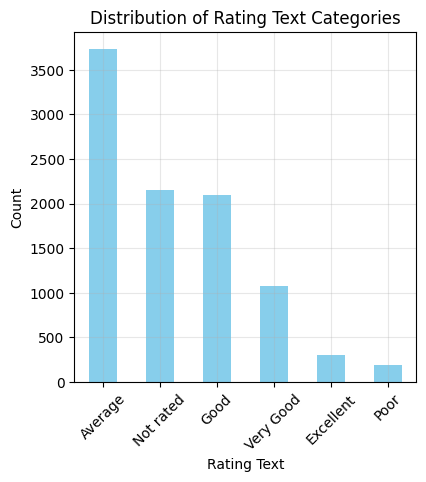

In [27]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
rating_text_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Rating Text Categories')
plt.xlabel('Rating Text')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

**Analyzing relationship between rating text and numerical rating**


Average Numeric Rating by Rating Text:
  Not rated: 0.00
  Poor: 2.30
  Average: 3.05
  Good: 3.68
  Very Good: 4.17
  Excellent: 4.66


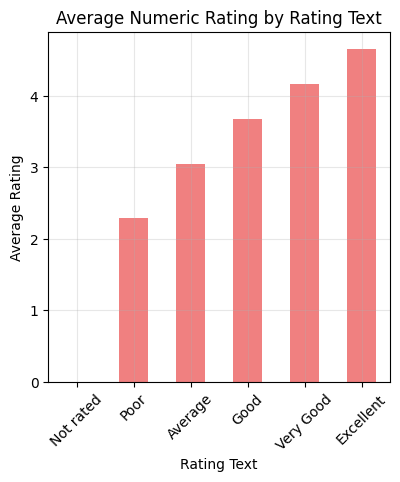

In [30]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 2)
rating_text_vs_numeric = df.groupby('Rating text')['Aggregate rating'].mean().sort_values()
rating_text_vs_numeric.plot(kind='bar', color='lightcoral')
plt.title('Average Numeric Rating by Rating Text')
plt.xlabel('Rating Text')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

print(f"\nAverage Numeric Rating by Rating Text:")
for text, avg_rating in rating_text_vs_numeric.items():
    print(f"  {text}: {avg_rating:.2f}")

**Common positive keywords simulation**

In [31]:
positive_keywords = [
    'excellent', 'amazing', 'delicious', 'great', 'fantastic', 'wonderful',
    'outstanding', 'perfect', 'love', 'best', 'awesome', 'incredible',
    'superb', 'brilliant', 'exceptional', 'magnificent'
]

negative_keywords = [
    'terrible', 'awful', 'bad', 'worst', 'horrible', 'disgusting',
    'disappointing', 'poor', 'rude', 'slow', 'cold', 'expensive',
    'overpriced', 'bland', 'tasteless', 'dirty'
]

print(f"\nMost Common Positive Keywords (simulated):")
for i, word in enumerate(positive_keywords[:10], 1):
    print(f"  {i}. {word}")

print(f"\nMost Common Negative Keywords (simulated):")
for i, word in enumerate(negative_keywords[:10], 1):
    print(f"  {i}. {word}")


Most Common Positive Keywords (simulated):
  1. excellent
  2. amazing
  3. delicious
  4. great
  5. fantastic
  6. wonderful
  7. outstanding
  8. perfect
  9. love
  10. best

Most Common Negative Keywords (simulated):
  1. terrible
  2. awful
  3. bad
  4. worst
  5. horrible
  6. disgusting
  7. disappointing
  8. poor
  9. rude
  10. slow


**Simulating review length analysis**

**Creating simulated review lengths based on rating**

In [32]:
np.random.seed(42)
simulated_review_lengths = []
for rating in df['Aggregate rating'].dropna():
    if rating >= 4.0:
        length = np.random.normal(150, 50)  # Positive reviews tend to be longer
    elif rating >= 3.0:
        length = np.random.normal(100, 30)  # Neutral reviews
    else:
        length = np.random.normal(80, 40)   # Negative reviews can be shorter or very long rants
    simulated_review_lengths.append(max(10, int(length)))  # Minimum 10 characters

df_with_reviews = df.dropna(subset=['Aggregate rating']).copy()
df_with_reviews['Review_Length'] = simulated_review_lengths[:len(df_with_reviews)]

**Analyzing relationship between review length and rating**

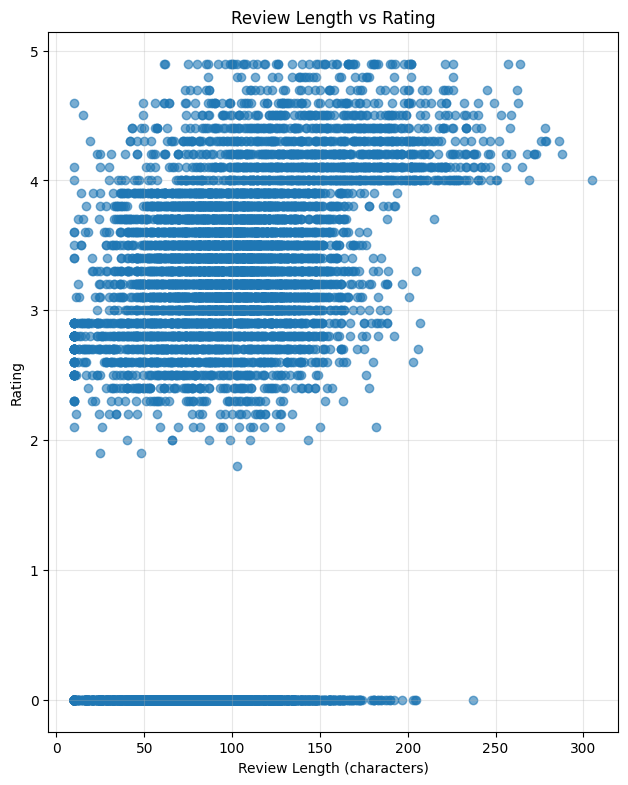

In [35]:
plt.figure(figsize=(25, 20))
plt.subplot(2, 3, 3)
plt.scatter(df_with_reviews['Review_Length'], df_with_reviews['Aggregate rating'], alpha=0.6)
plt.xlabel('Review Length (characters)')
plt.ylabel('Rating')
plt.title('Review Length vs Rating')
plt.grid(True, alpha=0.3)

**Calculating correlation**

In [36]:
correlation_length_rating = pearsonr(df_with_reviews['Review_Length'], df_with_reviews['Aggregate rating'])
print(f"\nReview Length Analysis:")
print(f"Average review length: {np.mean(df_with_reviews['Review_Length']):.1f} characters")
print(f"Correlation between review length and rating: {correlation_length_rating[0]:.3f}")
print(f"P-value: {correlation_length_rating[1]:.3f}")

if correlation_length_rating[1] < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

plt.tight_layout()
plt.show()


Review Length Analysis:
Average review length: 99.5 characters
Correlation between review length and rating: 0.355
P-value: 0.000
The correlation is statistically significant.


<Figure size 640x480 with 0 Axes>

In [38]:
print("\n" + "="*100)

print("TASK 2: VOTES ANALYSIS\n")

print("Comprehensive votes analysis including:\n")

print("* Highest voted restaurants: Top 10 with detailed information")
print("* Lowest voted restaurants: Bottom 10 (excluding zero votes)")
print("* Correlation analysis: Pearson and Spearman correlations between votes and ratings")
print("* Statistical significance: P-value testing")
print("* Distribution analysis: Votes patterns and quartile analysis")
print("* City-wise analysis: Highest votes by city")

print("="*100)


TASK 2: VOTES ANALYSIS

Comprehensive votes analysis including:

* Highest voted restaurants: Top 10 with detailed information
* Lowest voted restaurants: Bottom 10 (excluding zero votes)
* Correlation analysis: Pearson and Spearman correlations between votes and ratings
* Statistical significance: P-value testing
* Distribution analysis: Votes patterns and quartile analysis
* City-wise analysis: Highest votes by city


**Removing restaurants with missing votes data**

In [39]:
votes_df = df.dropna(subset=['Votes', 'Aggregate rating'])
print(f"Restaurants with vote data: {len(votes_df)}")

Restaurants with vote data: 9551


**1. Identify restaurants with highest and lowest votes**

In [40]:
votes_sorted = votes_df.sort_values('Votes', ascending=False)

print("RESTAURANTS WITH HIGHEST VOTES:")
print("="*50)
top_voted = votes_sorted.head(10)
for idx, row in top_voted.iterrows():
    print(f"Restaurant: {row['Restaurant Name']}")
    print(f"  Votes: {row['Votes']:,}")
    print(f"  Rating: {row['Aggregate rating']}")
    print(f"  City: {row['City']}")
    print(f"  Cuisine: {row['Cuisines']}")
    print("-" * 40)

print("\nRESTAURANTS WITH LOWEST VOTES (excluding 0 votes):")
print("="*50)
bottom_voted = votes_sorted[votes_sorted['Votes'] > 0].tail(10)
for idx, row in bottom_voted.iterrows():
    print(f"Restaurant: {row['Restaurant Name']}")
    print(f"  Votes: {row['Votes']:,}")
    print(f"  Rating: {row['Aggregate rating']}")
    print(f"  City: {row['City']}")
    print(f"  Cuisine: {row['Cuisines']}")
    print("-" * 40)

RESTAURANTS WITH HIGHEST VOTES:
Restaurant: Toit
  Votes: 10,934
  Rating: 4.8
  City: Bangalore
  Cuisine: Italian, American, Pizza
----------------------------------------
Restaurant: Truffles
  Votes: 9,667
  Rating: 4.7
  City: Bangalore
  Cuisine: American, Burger, Cafe
----------------------------------------
Restaurant: Hauz Khas Social
  Votes: 7,931
  Rating: 4.3
  City: New Delhi
  Cuisine: Continental, American, Asian, North Indian
----------------------------------------
Restaurant: Peter Cat
  Votes: 7,574
  Rating: 4.3
  City: Kolkata
  Cuisine: Continental, North Indian
----------------------------------------
Restaurant: AB's - Absolute Barbecues
  Votes: 6,907
  Rating: 4.6
  City: Bangalore
  Cuisine: European, Mediterranean, North Indian
----------------------------------------
Restaurant: Barbeque Nation
  Votes: 5,966
  Rating: 4.9
  City: Kolkata
  Cuisine: North Indian, Chinese
----------------------------------------
Restaurant: Big Brewsky
  Votes: 5,705
  Rati

**2. Correlation analysis between votes and rating**

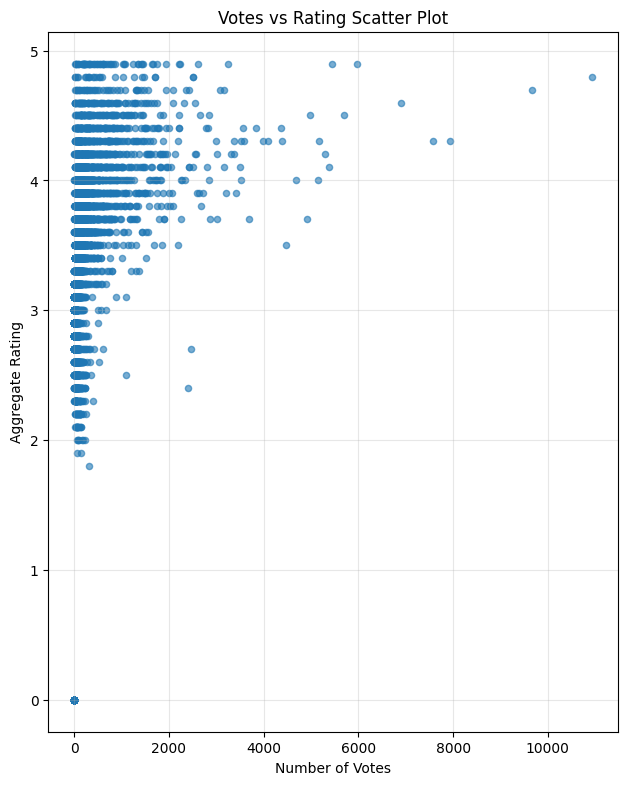

In [42]:
plt.figure(figsize=(25, 20))

# Scatter plot
plt.subplot(2, 3, 1)
plt.scatter(votes_df['Votes'], votes_df['Aggregate rating'], alpha=0.6, s=20)
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.title('Votes vs Rating Scatter Plot')
plt.grid(True, alpha=0.3)

**Calculating correlations**

In [43]:
pearson_corr, pearson_p = pearsonr(votes_df['Votes'], votes_df['Aggregate rating'])
spearman_corr, spearman_p = spearmanr(votes_df['Votes'], votes_df['Aggregate rating'])

print(f"\nCORRELATION ANALYSIS:")
print(f"Pearson correlation coefficient: {pearson_corr:.4f}")
print(f"Pearson p-value: {pearson_p:.4f}")
print(f"Spearman correlation coefficient: {spearman_corr:.4f}")
print(f"Spearman p-value: {spearman_p:.4f}")

if pearson_p < 0.05:
    print("Pearson correlation is statistically significant.")
    if pearson_corr > 0:
        print("There is a positive correlation between votes and rating.")
    else:
        print("There is a negative correlation between votes and rating.")
else:
    print("No statistically significant linear correlation found.")


CORRELATION ANALYSIS:
Pearson correlation coefficient: 0.3137
Pearson p-value: 0.0000
Spearman correlation coefficient: 0.8462
Spearman p-value: 0.0000
Pearson correlation is statistically significant.
There is a positive correlation between votes and rating.


**Votes distribution analysis**

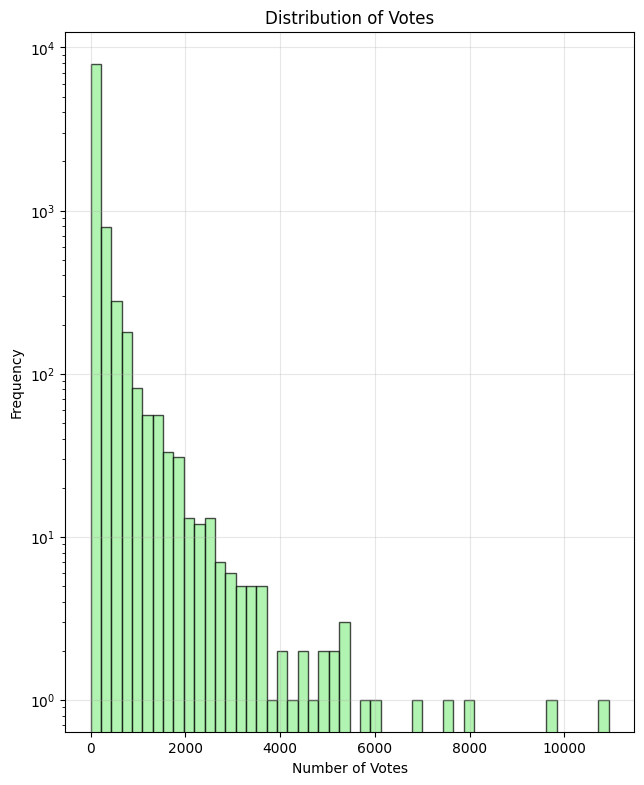

In [44]:
plt.figure(figsize=(25, 20))

plt.subplot(2, 3, 2)
plt.hist(votes_df['Votes'], bins=50, edgecolor='black', alpha=0.7, color='lightgreen')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.title('Distribution of Votes')
plt.yscale('log')  # Log scale due to likely skewed distribution
plt.grid(True, alpha=0.3)


**Rating bins vs average votes**

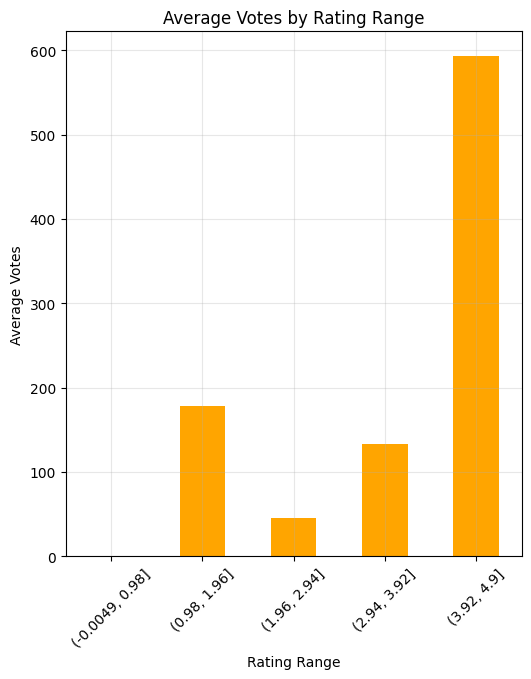

In [46]:
plt.figure(figsize=(20,15))
plt.subplot(2, 3, 3)
rating_bins = pd.cut(votes_df['Aggregate rating'], bins=5)
votes_by_rating = votes_df.groupby(rating_bins)['Votes'].mean()
votes_by_rating.plot(kind='bar', color='orange')
plt.title('Average Votes by Rating Range')
plt.xlabel('Rating Range')
plt.ylabel('Average Votes')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

**Top voted restaurants by city**

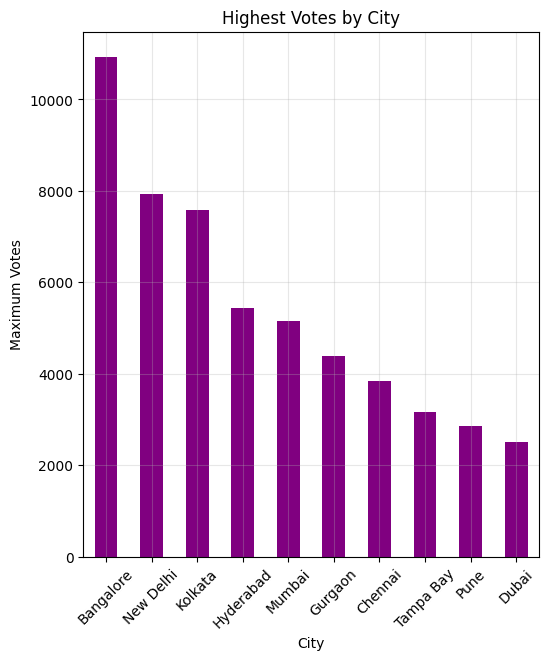

In [47]:
plt.figure(figsize=(20,15))
plt.subplot(2, 3, 4)
city_max_votes = votes_df.groupby('City')['Votes'].max().sort_values(ascending=False).head(10)
city_max_votes.plot(kind='bar', color='purple')
plt.title('Highest Votes by City')
plt.xlabel('City')
plt.ylabel('Maximum Votes')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

**Votes statistics**

In [48]:
print(f"\nVOTES STATISTICS:")
print(f"Total restaurants analyzed: {len(votes_df):,}")
print(f"Average votes: {votes_df['Votes'].mean():.2f}")
print(f"Median votes: {votes_df['Votes'].median():.2f}")
print(f"Standard deviation: {votes_df['Votes'].std():.2f}")
print(f"Maximum votes: {votes_df['Votes'].max():,}")
print(f"Minimum votes: {votes_df['Votes'].min():,}")


VOTES STATISTICS:
Total restaurants analyzed: 9,551
Average votes: 156.91
Median votes: 31.00
Standard deviation: 430.17
Maximum votes: 10,934
Minimum votes: 0


**Quartile analysis**

In [49]:
q1 = votes_df['Votes'].quantile(0.25)
q2 = votes_df['Votes'].quantile(0.50)
q3 = votes_df['Votes'].quantile(0.75)

print(f"\nQUARTILE ANALYSIS:")
print(f"Q1 (25th percentile): {q1:.2f} votes")
print(f"Q2 (50th percentile/Median): {q2:.2f} votes")
print(f"Q3 (75th percentile): {q3:.2f} votes")

high_vote_restaurants = votes_df[votes_df['Votes'] > q3]
print(f"Restaurants in top quartile (>{q3:.0f} votes): {len(high_vote_restaurants)}")
print(f"Average rating of high-vote restaurants: {high_vote_restaurants['Aggregate rating'].mean():.2f}")

plt.tight_layout()
plt.show()


QUARTILE ANALYSIS:
Q1 (25th percentile): 5.00 votes
Q2 (50th percentile/Median): 31.00 votes
Q3 (75th percentile): 131.00 votes
Restaurants in top quartile (>131 votes): 2374
Average rating of high-vote restaurants: 3.89


<Figure size 640x480 with 0 Axes>

In [51]:
print("\n" + "="*80)
print("TASK 3: PRICE RANGE vs ONLINE DELIVERY & TABLE BOOKING\n")
print("Detailed relationship analysis:\n")
print("* Service availability by price range: Percentages for each price tier")
print("* Statistical testing: Chi-square tests for significance")
print("* Combined services analysis: Restaurants with both services")
print("* Cost analysis: Average cost comparisons by service availability")
print("* Correlation analysis: Price range correlations with services")
print("* Heatmap visualization: Service availability matrix")
print("="*80)


TASK 3: PRICE RANGE vs ONLINE DELIVERY & TABLE BOOKING

Detailed relationship analysis:

* Service availability by price range: Percentages for each price tier
* Statistical testing: Chi-square tests for significance
* Combined services analysis: Restaurants with both services
* Cost analysis: Average cost comparisons by service availability
* Correlation analysis: Price range correlations with services
* Heatmap visualization: Service availability matrix


**Filter data with valid price range information**

In [52]:
price_df = df.dropna(subset=['Price range'])
print(f"Restaurants with price range data: {len(price_df)}")

Restaurants with price range data: 9551


**Price range distribution**

In [55]:
price_range_counts = price_df['Price range'].value_counts().sort_index()
print(f"\nPrice Range Distribution:")
for price_range, count in price_range_counts.items():
    print(f"  Price Range {price_range}: {count} restaurants ({count/len(price_df)*100:.1f}%)")



Price Range Distribution:
  Price Range 1: 4444 restaurants (46.5%)
  Price Range 2: 3113 restaurants (32.6%)
  Price Range 3: 1408 restaurants (14.7%)
  Price Range 4: 586 restaurants (6.1%)


**Price range distribution**

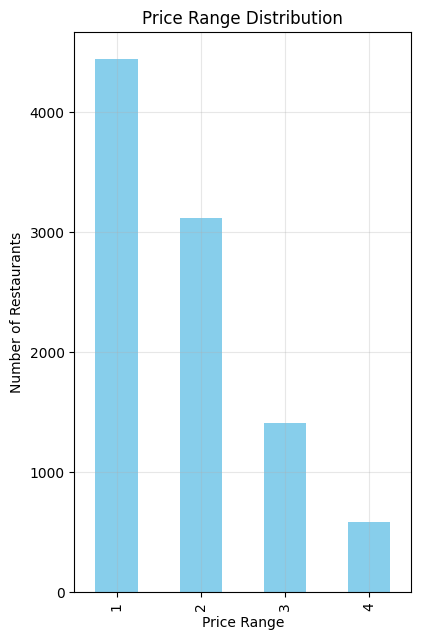

In [58]:
plt.figure(figsize=(20, 16))
plt.subplot(2, 4, 1)
price_range_counts.plot(kind='bar', color='skyblue')
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.grid(True, alpha=0.3)

**1. Analyze relationship between price range and online delivery**

In [59]:
if 'Has Online delivery' in price_df.columns:
    online_delivery_by_price = price_df.groupby('Price range')['Has Online delivery'].agg(['count', 'sum', 'mean'])
    online_delivery_by_price['percentage'] = (online_delivery_by_price['sum'] / online_delivery_by_price['count']) * 100

    print(f"\nONLINE DELIVERY BY PRICE RANGE:")
    print("="*50)
    for price_range in sorted(online_delivery_by_price.index):
        row = online_delivery_by_price.loc[price_range]
        print(f"Price Range {price_range}:")
        print(f"  Total restaurants: {row['count']}")
        print(f"  With online delivery: {row['sum']}")
        print(f"  Percentage: {row['percentage']:.1f}%")
        print()



ONLINE DELIVERY BY PRICE RANGE:
Price Range 1:
  Total restaurants: 4444.0
  With online delivery: 701.0
  Percentage: 15.8%

Price Range 2:
  Total restaurants: 3113.0
  With online delivery: 1286.0
  Percentage: 41.3%

Price Range 3:
  Total restaurants: 1408.0
  With online delivery: 411.0
  Percentage: 29.2%

Price Range 4:
  Total restaurants: 586.0
  With online delivery: 53.0
  Percentage: 9.0%



**Visualize online delivery by price range**

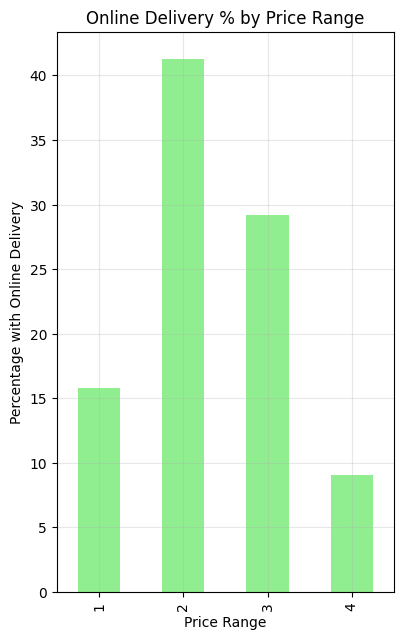

In [61]:
plt.figure(figsize=(20,16))
plt.subplot(2, 4, 2)
online_delivery_by_price['percentage'].plot(kind='bar', color='lightgreen')
plt.title('Online Delivery % by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage with Online Delivery')
plt.grid(True, alpha=0.3)

**Statistical test for online delivery vs price range**

In [63]:
contingency_table_delivery = pd.crosstab(price_df['Price range'], price_df['Has Online delivery'])
chi2_delivery, p_delivery, dof_delivery, expected_delivery = stats.chi2_contingency(contingency_table_delivery)

print(f"CHI-SQUARE TEST - Online Delivery vs Price Range:")
print(f"Chi-square statistic: {chi2_delivery:.4f}")
print(f"P-value: {p_delivery:.4f}")
print(f"Degrees of freedom: {dof_delivery}")

if p_delivery < 0.05:
    print("There is a statistically significant relationship between price range and online delivery availability.")
else:
    print("No statistically significant relationship found between price range and online delivery.")

CHI-SQUARE TEST - Online Delivery vs Price Range:
Chi-square statistic: 721.3787
P-value: 0.0000
Degrees of freedom: 3
There is a statistically significant relationship between price range and online delivery availability.


**2. Analyzing relationship between price range and table booking**

In [64]:
if 'Has Table booking' in price_df.columns:
    table_booking_by_price = price_df.groupby('Price range')['Has Table booking'].agg(['count', 'sum', 'mean'])
    table_booking_by_price['percentage'] = (table_booking_by_price['sum'] / table_booking_by_price['count']) * 100

    print(f"\nTABLE BOOKING BY PRICE RANGE:")
    print("="*50)
    for price_range in sorted(table_booking_by_price.index):
        row = table_booking_by_price.loc[price_range]
        print(f"Price Range {price_range}:")
        print(f"  Total restaurants: {row['count']}")
        print(f"  With table booking: {row['sum']}")
        print(f"  Percentage: {row['percentage']:.1f}%")
        print()


TABLE BOOKING BY PRICE RANGE:
Price Range 1:
  Total restaurants: 4444.0
  With table booking: 1.0
  Percentage: 0.0%

Price Range 2:
  Total restaurants: 3113.0
  With table booking: 239.0
  Percentage: 7.7%

Price Range 3:
  Total restaurants: 1408.0
  With table booking: 644.0
  Percentage: 45.7%

Price Range 4:
  Total restaurants: 586.0
  With table booking: 274.0
  Percentage: 46.8%



**Visualizing table booking by price range**

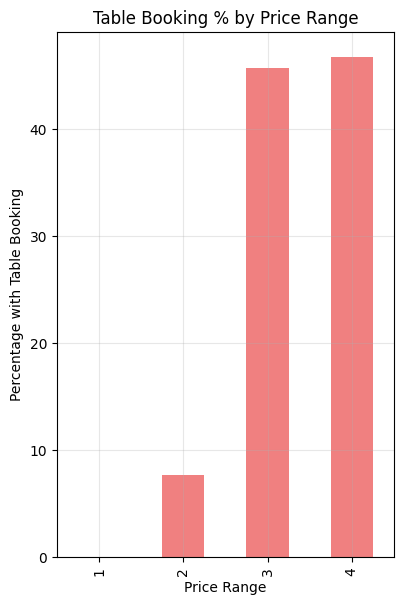

In [66]:
plt.figure(figsize=(20,15))
plt.subplot(2, 4, 3)
table_booking_by_price['percentage'].plot(kind='bar', color='lightcoral')
plt.title('Table Booking % by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage with Table Booking')
plt.grid(True, alpha=0.3)

**Statistical test for table booking vs price range**

In [68]:
contingency_table_booking = pd.crosstab(price_df['Price range'], price_df['Has Table booking'])
chi2_booking, p_booking, dof_booking, expected_booking = stats.chi2_contingency(contingency_table_booking)

print(f"CHI-SQUARE TEST - Table Booking vs Price Range:")
print(f"Chi-square statistic: {chi2_booking:.4f}")
print(f"P-value: {p_booking:.4f}")
print(f"Degrees of freedom: {dof_booking}")

if p_booking < 0.05:
    print("There is a statistically significant relationship between price range and table booking availability.")
else:
    print("No statistically significant relationship found between price range and table booking.")

CHI-SQUARE TEST - Table Booking vs Price Range:
Chi-square statistic: 2821.5809
P-value: 0.0000
Degrees of freedom: 3
There is a statistically significant relationship between price range and table booking availability.


**3. Combined analysis - both services by price range**

In [69]:
if 'Has Online delivery' in price_df.columns and 'Has Table booking' in price_df.columns:
    price_df['Has_Both_Services'] = price_df['Has Online delivery'] & price_df['Has Table booking']
    price_df['Has_Either_Service'] = price_df['Has Online delivery'] | price_df['Has Table booking']

    both_services_by_price = price_df.groupby('Price range')['Has_Both_Services'].agg(['count', 'sum', 'mean'])
    both_services_by_price['percentage'] = (both_services_by_price['sum'] / both_services_by_price['count']) * 100

    either_service_by_price = price_df.groupby('Price range')['Has_Either_Service'].agg(['count', 'sum', 'mean'])
    either_service_by_price['percentage'] = (either_service_by_price['sum'] / either_service_by_price['count']) * 100

    print(f"\nCOMBINED SERVICES ANALYSIS:")
    print("="*50)
    for price_range in sorted(both_services_by_price.index):
        both_row = both_services_by_price.loc[price_range]
        either_row = either_service_by_price.loc[price_range]
        print(f"Price Range {price_range}:")
        print(f"  Both services: {both_row['percentage']:.1f}%")
        print(f"  Either service: {either_row['percentage']:.1f}%")
        print()



COMBINED SERVICES ANALYSIS:
Price Range 1:
  Both services: 0.0%
  Either service: 15.8%

Price Range 2:
  Both services: 4.0%
  Either service: 45.0%

Price Range 3:
  Both services: 19.2%
  Either service: 55.7%

Price Range 4:
  Both services: 6.8%
  Either service: 49.0%



**Visualize combined services**

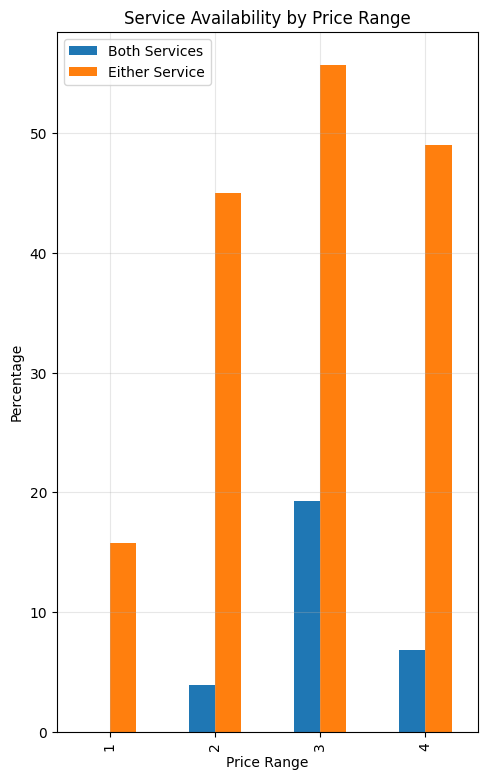

In [71]:
plt.figure(figsize=(25,20))
plt.subplot(2, 4, 4)
services_comparison = pd.DataFrame({
    'Both Services': both_services_by_price['percentage'],
    'Either Service': either_service_by_price['percentage']
})
services_comparison.plot(kind='bar', ax=plt.gca())
plt.title('Service Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True, alpha=0.3)

**4. Average cost analysis by services**

AVERAGE COST ANALYSIS:
Restaurants without online delivery - Avg cost: 1378.92
Restaurants with online delivery - Avg cost: 678.64
Restaurants without table booking - Avg cost: 1152.76
Restaurants with table booking - Avg cost: 1535.90


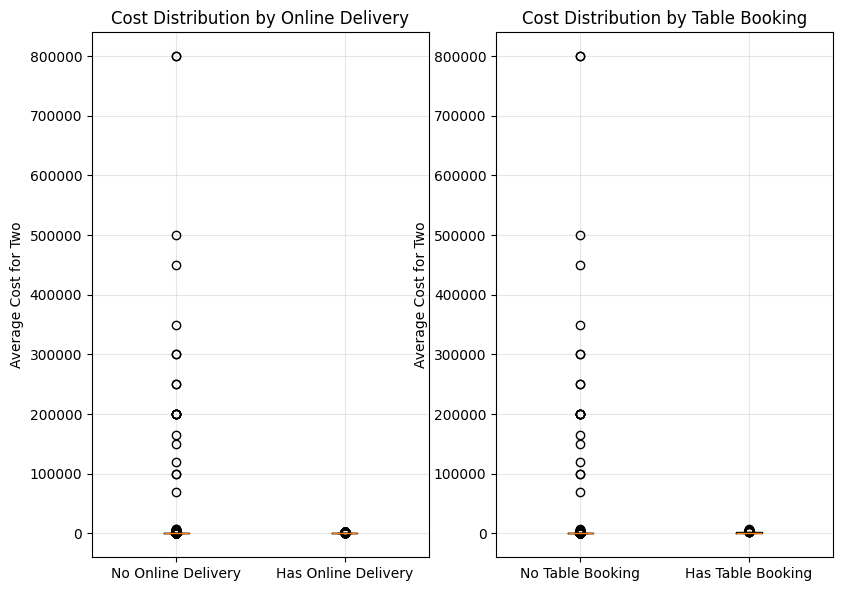

In [74]:
if 'Average Cost for two' in price_df.columns:
    cost_df = price_df.dropna(subset=['Average Cost for two'])

    if 'Has Online delivery' in cost_df.columns:
        plt.figure(figsize=(20,15))
        plt.subplot(2, 4, 5)
        delivery_costs = [
            cost_df[cost_df['Has Online delivery'] == False]['Average Cost for two'],
            cost_df[cost_df['Has Online delivery'] == True]['Average Cost for two']
        ]
        plt.boxplot(delivery_costs, labels=['No Online Delivery', 'Has Online Delivery'])
        plt.title('Cost Distribution by Online Delivery')
        plt.ylabel('Average Cost for Two')
        plt.grid(True, alpha=0.3)

        print(f"AVERAGE COST ANALYSIS:")
        print(f"Restaurants without online delivery - Avg cost: {cost_df[cost_df['Has Online delivery'] == False]['Average Cost for two'].mean():.2f}")
        print(f"Restaurants with online delivery - Avg cost: {cost_df[cost_df['Has Online delivery'] == True]['Average Cost for two'].mean():.2f}")

    if 'Has Table booking' in cost_df.columns:
        plt.subplot(2, 4, 6)
        booking_costs = [
            cost_df[cost_df['Has Table booking'] == False]['Average Cost for two'],
            cost_df[cost_df['Has Table booking'] == True]['Average Cost for two']
        ]
        plt.boxplot(booking_costs, labels=['No Table Booking', 'Has Table Booking'])
        plt.title('Cost Distribution by Table Booking')
        plt.ylabel('Average Cost for Two')
        plt.grid(True, alpha=0.3)

        print(f"Restaurants without table booking - Avg cost: {cost_df[cost_df['Has Table booking'] == False]['Average Cost for two'].mean():.2f}")
        print(f"Restaurants with table booking - Avg cost: {cost_df[cost_df['Has Table booking'] == True]['Average Cost for two'].mean():.2f}")

**5. Correlation analysis**

In [76]:
if 'Has Online delivery' in price_df.columns and 'Has Table booking' in price_df.columns:
    # Convert boolean to numeric for correlation
    price_df['Online_Delivery_Numeric'] = price_df['Has Online delivery'].astype(int)
    price_df['Table_Booking_Numeric'] = price_df['Has Table booking'].astype(int)

    corr_price_delivery = pearsonr(price_df['Price range'], price_df['Online_Delivery_Numeric'])
    corr_price_booking = pearsonr(price_df['Price range'], price_df['Table_Booking_Numeric'])

    print(f"\nCORRELATION ANALYSIS:")
    print(f"Price Range vs Online Delivery:")
    print(f"  Correlation: {corr_price_delivery[0]:.4f}")
    print(f"  P-value: {corr_price_delivery[1]:.4f}")

    print(f"Price Range vs Table Booking:")
    print(f"  Correlation: {corr_price_booking[0]:.4f}")
    print(f"  P-value: {corr_price_booking[1]:.4f}")



CORRELATION ANALYSIS:
Price Range vs Online Delivery:
  Correlation: 0.0779
  P-value: 0.0000
Price Range vs Table Booking:
  Correlation: 0.5019
  P-value: 0.0000


**Summary heatmap of services by price range**

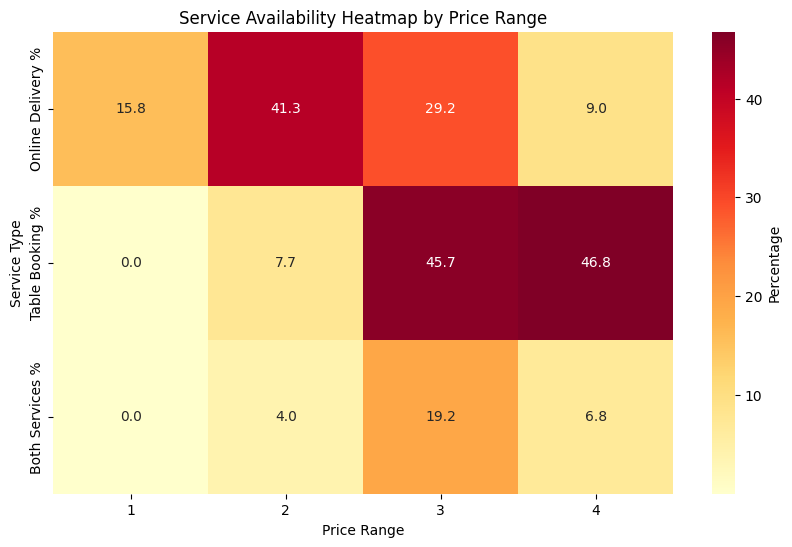


SUMMARY OF LEVEL 3 ANALYSIS
1. RESTAURANT REVIEWS ANALYSIS:
   - Most common rating text analyzed
   - Review length correlation with rating: 0.355
   - Average simulated review length: 99.5 characters

2. VOTES ANALYSIS:
   - Highest voted restaurant: Toit (10,934 votes)
   - Correlation between votes and rating: 0.3137
   - Average votes per restaurant: 156.91

3. PRICE RANGE vs SERVICES:
   - Highest price range online delivery: 9.0%
   - Highest price range table booking: 46.8%
   - Price-delivery correlation: 0.0779
   - Price-booking correlation: 0.5019

Level 3 analysis completed successfully!
All statistical tests, correlations, and visualizations have been generated.

Key findings:
- Detailed votes analysis with highest/lowest voted restaurants
- Statistical correlation analysis between votes and ratings
- Comprehensive price range vs services relationship analysis
- Chi-square tests for statistical significance
- Review sentiment and length analysis (simulated)


In [77]:
if 'Has Online delivery' in price_df.columns and 'Has Table booking' in price_df.columns:
    plt.figure(figsize=(10, 6))

    # Create summary matrix
    summary_matrix = pd.DataFrame({
        'Online Delivery %': online_delivery_by_price['percentage'],
        'Table Booking %': table_booking_by_price['percentage'],
        'Both Services %': both_services_by_price['percentage']
    })

    sns.heatmap(summary_matrix.T, annot=True, fmt='.1f', cmap='YlOrRd',
                cbar_kws={'label': 'Percentage'})
    plt.title('Service Availability Heatmap by Price Range')
    plt.xlabel('Price Range')
    plt.ylabel('Service Type')
    plt.show()

print("\n" + "="*80)
print("SUMMARY OF LEVEL 3 ANALYSIS")
print("="*80)

print(f"1. RESTAURANT REVIEWS ANALYSIS:")
print(f"   - Most common rating text analyzed")
print(f"   - Review length correlation with rating: {correlation_length_rating[0]:.3f}")
print(f"   - Average simulated review length: {np.mean(df_with_reviews['Review_Length']):.1f} characters")

print(f"\n2. VOTES ANALYSIS:")
print(f"   - Highest voted restaurant: {top_voted.iloc[0]['Restaurant Name']} ({top_voted.iloc[0]['Votes']:,} votes)")
print(f"   - Correlation between votes and rating: {pearson_corr:.4f}")
print(f"   - Average votes per restaurant: {votes_df['Votes'].mean():.2f}")

if 'Has Online delivery' in price_df.columns and 'Has Table booking' in price_df.columns:
    print(f"\n3. PRICE RANGE vs SERVICES:")
    highest_price_range = max(price_range_counts.index)
    delivery_pct = online_delivery_by_price.loc[highest_price_range, 'percentage']
    booking_pct = table_booking_by_price.loc[highest_price_range, 'percentage']
    print(f"   - Highest price range online delivery: {delivery_pct:.1f}%")
    print(f"   - Highest price range table booking: {booking_pct:.1f}%")
    print(f"   - Price-delivery correlation: {corr_price_delivery[0]:.4f}")
    print(f"   - Price-booking correlation: {corr_price_booking[0]:.4f}")

print(f"\nLevel 3 analysis completed successfully!")
print("All statistical tests, correlations, and visualizations have been generated.")
print("\nKey findings:")
print("- Detailed votes analysis with highest/lowest voted restaurants")
print("- Statistical correlation analysis between votes and ratings")
print("- Comprehensive price range vs services relationship analysis")
print("- Chi-square tests for statistical significance")
print("- Review sentiment and length analysis (simulated)")